**🧭 Lesson 7: Missing Data Handling & Data Cleaning**

**🎯 Objective**

By the end of this lesson, you will be able to:

- Detect missing values with .isna(), .isnull(), .notna()
- Count & analyze missingness (row-wise, column-wise, % wise)
- Replace missing data using common imputation techniques
- Remove missing rows/columns using smart thresholds
- Perform conditional imputation using group-level aggregates
- Clean messy text data (empty strings, “?”, “NA”, etc.)
- Save cleaned datasets professionally

**🧱 What Counts as “Missing Data” in Pandas?**

Pandas recognizes the following as missing:

| Missing Type          | Example                   | Pandas Converts To |
|-----------------------|---------------------------|--------------------|
| None                  | Python missing            | NaN                |
| np.nan                | NumPy missing             | NaN                |
| Empty string          | "" or " "                 | (not NaN unless you convert it) |
| Missing datetime      | NaT                       | NaT                |
| Bad data symbols      | "?", "N/A", "--"          | (convert using `na_values`) |


In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Example dataset**

In [464]:
df = pd.DataFrame({
    'Name': ['Dhiraj','Pooja','Aarav',None,'Ananya'],
    'Age': [36, np.nan, 12, 29, 22],
    'City': ['Mumbai', 'Delhi', None, '', 'Noida'],
    'Salary': [150000, 120000, np.nan, 95000, 110000]
})
df

,Name,Age,City,Salary
0,Dhiraj,36.0,Mumbai,150000.0
1,Pooja,NaN,Delhi,120000.0
2,Aarav,12.0,None,NaN
3,None,29.0,,95000.0
4,Ananya,22.0,Noida,110000.0


**🧩 Detecting Missing Data**

**🔹 Boolean mask**

In [465]:
# Check for missing (NaN) values in the DataFrame
df.isna()

,Name,Age,City,Salary
0,False,False,False,False
1,False,True,False,False
2,False,False,True,True
3,True,False,False,False
4,False,False,False,False


In [466]:
# Get the count of missing values per column
df.isna().sum()

Name      1
Age       1
City      1
Salary    1
dtype: int64

**🔹 Count missing per row**

In [467]:
# Check for missing (NaN) values row by row in the DataFrame
# The 'axis=1' argument ensures that the sum is calculated along each row (horizontally)
df.isna().sum(axis=1)

0    0
1    1
2    2
3    1
4    0
dtype: int64

**🔹 Count missing in entire DataFrame**

In [468]:
# Count the total number of missing (NaN) values in the entire DataFrame
# The first 'sum()' sums missing values column-wise, then the second 'sum()' sums them across all columns
df.isna().sum().sum()

np.int64(4)

**🔹 Detect non-missing**

In [469]:
# Check for non-missing (non-NaN) values in the DataFrame
# Returns a DataFrame of the same shape as df, with True where the value is not NaN, and False where it is NaN
df.notna()

,Name,Age,City,Salary
0,True,True,True,True
1,True,False,True,True
2,True,True,False,False
3,False,True,True,True
4,True,True,True,True


In [470]:
# Count non-missing values per column
df.notna().sum()

Name      4
Age       4
City      4
Salary    4
dtype: int64

In [471]:
# Count non-missing values per row
df.notna().sum(axis=1)

0    4
1    3
2    2
3    3
4    4
dtype: int64

**🧩 Clean Empty Strings to NaN (VERY important!)**
- Empty strings are NOT treated as NaN.

In [472]:
# Replace empty strings ('') in the 'City' column with NaN values
# This operation modifies the 'City' column in place, without needing to assign it back to df['City']
import numpy as np
df['City'].replace('', np.nan, inplace=True)

# View the updated DataFrame
print(df)

     Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN   95000.0
4  Ananya  22.0   Noida  110000.0


C:\Users\dhira\AppData\Local\Temp\ipykernel_32920\3484377249.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace('', np.nan, inplace=True)


**🧩 Removing Missing Data**

In [473]:
# Drop rows with any missing (NaN) values in the DataFrame
# By default, it removes rows where any NaN value exists
df.dropna()

,Name,Age,City,Salary
0,Dhiraj,36.0,Mumbai,150000.0
4,Ananya,22.0,Noida,110000.0


In [474]:
df

,Name,Age,City,Salary
0,Dhiraj,36.0,Mumbai,150000.0
1,Pooja,NaN,Delhi,120000.0
2,Aarav,12.0,None,NaN
3,None,29.0,NaN,95000.0
4,Ananya,22.0,Noida,110000.0


**Drop rows with missing in specific columns**

In [475]:
print("orginaldata:\n", df)

# Drop rows where 'Name' or 'Age' column has missing (NaN) values
# Only considers the 'Name' and 'Age' columns when determining which rows to drop
df.dropna(subset=['Name', 'Age','City'])

orginaldata:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN   95000.0
4  Ananya  22.0   Noida  110000.0


,Name,Age,City,Salary
0,Dhiraj,36.0,Mumbai,150000.0
4,Ananya,22.0,Noida,110000.0


**Drop columns with too many missing values**

In [476]:
# Print the original DataFrame to check the initial data
print("original_df:\n", df)

# Drop columns that have fewer than 3 non-NaN values
# The 'axis=1' argument specifies that the operation is applied to columns
# 'thresh=3' ensures that only columns with at least 3 non-NaN values will be kept
df.dropna(axis=1, thresh=3)

original_df:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN   95000.0
4  Ananya  22.0   Noida  110000.0


,Name,Age,City,Salary
0,Dhiraj,36.0,Mumbai,150000.0
1,Pooja,NaN,Delhi,120000.0
2,Aarav,12.0,None,NaN
3,None,29.0,NaN,95000.0
4,Ananya,22.0,Noida,110000.0


**Drop rows where ALL columns are missing**

In [477]:
# Print the original DataFrame
print("original_df:\n", df)

# Drop rows ONLY when ALL columns in that row are NaN
df.dropna(how="all")

original_df:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN   95000.0
4  Ananya  22.0   Noida  110000.0


,Name,Age,City,Salary
0,Dhiraj,36.0,Mumbai,150000.0
1,Pooja,NaN,Delhi,120000.0
2,Aarav,12.0,None,NaN
3,None,29.0,NaN,95000.0
4,Ananya,22.0,Noida,110000.0


**🧩 Filling Missing Data (Imputation)**
- Fill with constant

In [478]:
# Print the original DataFrame to view all current values, including NaNs
print("original_df:\n", df)

# Replace all NaN (missing) values in the entire DataFrame with the string 'Unknown'
# 'inplace=True' ensures that the DataFrame is updated directly without needing reassignment
fillna = df.fillna('Unknown')

# Display the updated DataFrame after filling missing values
print(fillna)


original_df:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN   95000.0
4  Ananya  22.0   Noida  110000.0
      Name      Age     City    Salary
0   Dhiraj     36.0   Mumbai  150000.0
1    Pooja  Unknown    Delhi  120000.0
2    Aarav     12.0  Unknown   Unknown
3  Unknown     29.0  Unknown   95000.0
4   Ananya     22.0    Noida  110000.0


In [479]:
# Print the original DataFrame to view all current values, including NaNs
print("original_df:\n", df)

# Fill NaN values in 'Name' with 'NA' and 'City' with 'TBU'
df_na = df.fillna({'Name': 'NA', 'City': 'TBU'})
print("\nafter update:\n",df_na)

original_df:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN   95000.0
4  Ananya  22.0   Noida  110000.0

after update:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0     TBU       NaN
3      NA  29.0     TBU   95000.0
4  Ananya  22.0   Noida  110000.0


**Forward fill (ffill)**

In [480]:
# Print the original DataFrame to see all current values, including NaNs
print("original_df:\n", df)

# Create a new DataFrame 'df_ffill' where missing values (NaN) are filled using forward fill
# 'method="ffill"' propagates the last valid value **downwards** in each column
df_ffill = df.fillna(method='ffill')

print("\nDownwards_fill:\n",df_ffill)

original_df:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN   95000.0
4  Ananya  22.0   Noida  110000.0

Downwards_fill:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja  36.0   Delhi  120000.0
2   Aarav  12.0   Delhi  120000.0
3   Aarav  29.0   Delhi   95000.0
4  Ananya  22.0   Noida  110000.0


C:\Users\dhira\AppData\Local\Temp\ipykernel_32920\2357240447.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')


**Backward fill (bfill)**
- Copies next value upward:

In [481]:
# Print the original DataFrame to see all current values, including NaNs
print("original_df:\n", df)

# Create a new DataFrame 'df_bfill' where missing values (NaN) are filled using backward fill
# 'method="bfill"' propagates the next valid value **upwards** in each column
df_bfill = df.fillna(method='bfill')

# Print the DataFrame after backward filling to see the changes
print("\nUpwards_fill:\n", df_bfill)

original_df:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN   95000.0
4  Ananya  22.0   Noida  110000.0

Upwards_fill:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja  12.0   Delhi  120000.0
2   Aarav  12.0   Noida   95000.0
3  Ananya  29.0   Noida   95000.0
4  Ananya  22.0   Noida  110000.0


C:\Users\dhira\AppData\Local\Temp\ipykernel_32920\4278917311.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


**Fill numeric data with mean/median/mode**

In [482]:
# Print the original DataFrame to see all current values, including NaNs
print("original_df:\n", df)

# Fill missing values in the 'Age' column with the mean of that column
# This replaces NaNs with the average age
df_mean = df['Age'].fillna(df['Age'].mean())
print("\nprint_mean_fillna:\n", df_mean)

# Fill missing values in the 'Salary' column with the median of that column
# This replaces NaNs with the middle value of the salary distribution
df_median = df['Salary'].fillna(df['Salary'].median())
print("\nprint_median_fillna:\n", df_median)

# Fill missing values in the 'City' column with the mode of that column
# The mode is the most frequent value in the column
# Since mode() returns a Series, we select the first value with [0]
df_mode = df['City'].fillna(df['City'].mode()[0])
print("\nprint_mode_fillna:\n", df_mode)

df_mode2 = df['Name'].fillna(df['Name'].mode()[0])
print("\nprint_mode2_fillna:\n", df_mode2)



original_df:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN   95000.0
4  Ananya  22.0   Noida  110000.0

print_mean_fillna:
 0    36.00
1    24.75
2    12.00
3    29.00
4    22.00
Name: Age, dtype: float64

print_median_fillna:
 0    150000.0
1    120000.0
2    115000.0
3     95000.0
4    110000.0
Name: Salary, dtype: float64

print_mode_fillna:
 0    Mumbai
1     Delhi
2     Delhi
3     Delhi
4     Noida
Name: City, dtype: object

print_mode2_fillna:
 0    Dhiraj
1     Pooja
2     Aarav
3     Aarav
4    Ananya
Name: Name, dtype: object


**Group-wise smart imputation (PRO LEVEL)**

In [483]:
# Fill missing values in 'Salary' column based on the mean salary of each 'City'
# groupby('City') creates groups for each city
# transform applies a function to each group and returns a Series with the same index
# lambda x: x.fillna(x.mean()) fills NaN in each group with that group's mean
df['Salary'] = df.groupby('City')['Salary'].transform(lambda x: x.fillna(x.mean()))

# Display the updated DataFrame
print(df)

     Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN       NaN
4  Ananya  22.0   Noida  110000.0


**🧩 Replace Bad Values (Common in Messy Datasets)**

In [484]:
# Print the original DataFrame to see all current values, including NaNs
print("original_df:\n", df)

# Replace specific placeholder values ('?', 'N/A', '--') with actual NaN
# This helps standardize missing values so they can be handled consistently
df_bad = df.replace({'?': np.nan, 'N/A': np.nan, '--': np.nan})

# Display the updated DataFrame with standardized NaNs
print('\nspecial characters or placeholders:\n',df_bad)


original_df:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN       NaN
4  Ananya  22.0   Noida  110000.0

special characters or placeholders:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN       NaN
4  Ananya  22.0   Noida  110000.0


**🧩 Percent of Missing Values (Feature Screening)**

In [485]:
# Print the original DataFrame to see all current values, including NaNs
print("original_df:\n", df)

# Calculate the percentage of missing values for each column
# df.isna() -> True for NaN, False otherwise
# .sum() -> counts the number of NaNs in each column
# /len(df) * 100 -> converts counts to percentage
# .sort_values(ascending=True) -> sort columns by % of missing values in ascending order
df_fs = (df.isna().sum() / len(df) * 100).sort_values(ascending=True)

# Convert the numbers to strings and add the percentage sign
df_fs_percent = df_fs.map(lambda x: f"{x:.1f}%")

# Display the result with percentage signs
print("\nPercent of Missing with % sign:\n", df_fs_percent)

original_df:
      Name   Age    City    Salary
0  Dhiraj  36.0  Mumbai  150000.0
1   Pooja   NaN   Delhi  120000.0
2   Aarav  12.0    None       NaN
3    None  29.0     NaN       NaN
4  Ananya  22.0   Noida  110000.0

Percent of Missing with % sign:
 Name      20.0%
Age       20.0%
City      40.0%
Salary    40.0%
dtype: object


**🧩 Simple Visualization of Missingness**

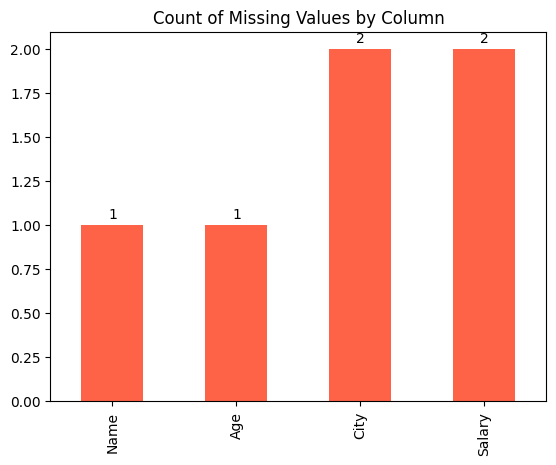

In [486]:


# Optional but powerful for Exploratory Data Analysis (EDA)
# This will plot a bar chart showing the count of missing values in each column
# Count missing values per column
missing_counts = df.isna().sum()

ax = df.isna().sum().plot(kind='bar', color='tomato')

# Add title and labels for clarity
plt.title('Count of Missing Values by Column')

# Add data labels on top of each bar
for i, v in enumerate(missing_counts):
    ax.text(i,v+0.1,str(v),ha = 'center',va='top')

# Show the plot
plt.show()

**🧩 Full Cleaning Pipeline Example (Professional ETL)**

In [ ]:
import pandas as pd
import numpy as np

# File path
messy_people_url = r"C:\Users\dhira\Desktop\python-mastery\pandas\dataset\raw\messy_people.csv"

# ------------------------
# Step 1: Load the messy dataset
df_messy_people = pd.read_csv(messy_people_url)
print("\nOriginal DataFrame loaded:\n", df_messy_people.head())

# ------------------------
# Step 2: Clean column names (strip whitespace and lowercase)
df_messy_people.columns = df_messy_people.columns.str.strip().str.lower()
print("\nColumn names cleaned:\n", df_messy_people.columns)

# ------------------------
# Step 3: Replace blank strings with NaN
df_messy_people.replace('', np.nan, inplace=True)
print("\nBlank strings replaced with NaN:\n", df_messy_people.head())

# ------------------------
# Step 4: Convert 'age' column to numeric (invalid entries become NaN)
df_messy_people['age'] = pd.to_numeric(df_messy_people['age'], errors='coerce')
print("\n'Age' column converted to numeric:\n", df_messy_people['age'].head())

# ------------------------
# Step 5: Impute missing Age with mean age
df_messy_people['age'].fillna(df_messy_people['age'].mean(), inplace=True)
print("\nMissing 'Age' values filled with mean:\n", df_messy_people['age'].head())

# ------------------------
# Step 6: Fill missing City values with 'unknown'
df_messy_people['city'].fillna('unknown', inplace=True)
print("\nMissing 'City' values filled with 'unknown':\n", df_messy_people['city'].head())

# ------------------------
# Step 7: Drop rows where 'name' is missing
df_messy_people.dropna(subset=['name'], inplace=True)
print("\nRows with missing 'Name' dropped:\n", df_messy_people.head())

# ------------------------
# Step 8: Save cleaned dataset back to CSV
df_messy_people.to_csv(messy_people_url, index=False)
print("\nCleaned dataset saved to:\n", messy_people_url)


Original DataFrame loaded:
         name   age     city  salary
0      aRjun  29.0   Delhi    72000
1     DHIRAJ  36.0    Noida  150000
2    pooja    32.5   mumbai   98000

Column names cleaned:
 Index(['name', 'age', 'city', 'salary'], dtype='object')

Blank strings replaced with NaN:
         name   age     city  salary
0      aRjun  29.0   Delhi    72000
1     DHIRAJ  36.0    Noida  150000
2    pooja    32.5   mumbai   98000

'Age' column converted to numeric:
 0    29.0
1    36.0
2    32.5
Name: age, dtype: float64

Missing 'Age' values filled with mean:
 0    29.0
1    36.0
2    32.5
Name: age, dtype: float64

Missing 'City' values filled with 'unknown':
 0     Delhi 
1      Noida
2     mumbai
Name: city, dtype: object

Rows with missing 'Name' dropped:
         name   age     city  salary
0      aRjun  29.0   Delhi    72000
1     DHIRAJ  36.0    Noida  150000
2    pooja    32.5   mumbai   98000

Cleaned dataset saved to:
 C:\Users\dhira\Desktop\GENAI\pandas\dataset\raw\messy_peo

C:\Users\dhira\AppData\Local\Temp\ipykernel_32920\397307314.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_messy_people['age'].fillna(df_messy_people['age'].mean(), inplace=True)
C:\Users\dhira\AppData\Local\Temp\ipykernel_32920\397307314.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b